In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating project at `~/Coding/julia/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


In [2]:
if false
    ϵ = 0.48
    κ = 1.68
    δ = 0.21
    R0 = 6.2
    B0 = 5.3
    ip = 15.E6
    beta_n = 1.0
    x_point=(5.0,-6.0)
    symmetric=true

    resolution = 129

    dd = IMAS.dd()
    resize!(dd.equilibrium.time_slice,1)
    FUSE.init(dd.equilibrium.time_slice[1]; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=x_point)

    eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium.time_slice[1], symmetric=symmetric)
    @time FUSE.step(eqactor)
    dd.equilibrium.time_slice[1] = FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2),0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))
    dd.equilibrium.time_slice[1].global_quantities.li_3 = 1.0 # made up!
    dd.equilibrium.time_slice[1].time = 0.0
    dd.equilibrium.time = [0.0]
    dd.equilibrium.vacuum_toroidal_field.r0 = R0
    dd.equilibrium.vacuum_toroidal_field.b0 = [B0]

    plot(dd.equilibrium.time_slice[1])
    dd.equilibrium.time_slice[1];
else
    filename=joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    IMAS.flux_surfaces(dd.equilibrium);
    nothing;
end

equilibrium.ids_properties was skipped in IMAS.jl data dictionary


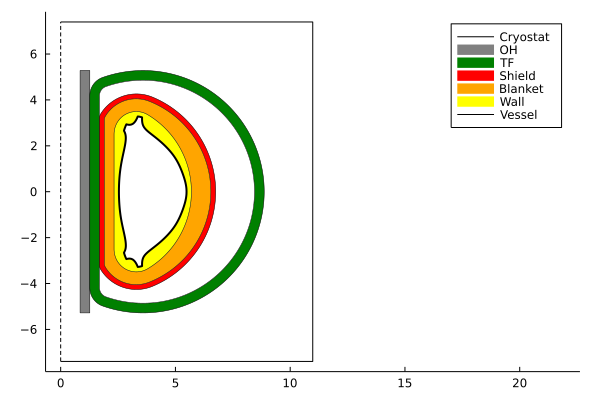

In [424]:
# Initialize eq, build
eqt=dd.equilibrium.time_slice[1]
rb=dd.radial_build=IMAS.radial_build()
FUSE.init(rb, eqt, is_nuclear_facility=true, conformal_vessel=true, pf_inside_tf=true, pf_outside_tf=true);
display(plot(rb))